### Polish parliamentary elections 2019

I'm going to create some visualisations for the Polish parliamentary elections that happened on October 13th, 2019.

Data source: https://sejmsenat2019.pkw.gov.pl/sejmsenat2019/pl/dane_w_arkuszach

Tableau vis: https://public.tableau.com/views/Polishparliamentaryelections2019/Polishparliamentaryelections2019

### Importing the packages

In [1]:
import pandas
import geopandas
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import HTML

### Loading the data

In [2]:
df = pandas.read_csv("..\\data\\wyniki_gl_na_listy_po_powiatach_proc_sejm.csv", delimiter=";", decimal=",")
df.head()

,Kod TERYT,Powiat,Województwo,Frekwencja,% głosów nieważnych,W tym z powodu postawienia znaku „X” obok nazwiska dwóch lub większej liczby kandydatów z różnych list,W tym z powodu niepostawienia znaku „X” obok nazwiska żadnego kandydata,W tym z powodu postawienia znaku „X” wyłącznie obok nazwiska kandydata na liście której rejestracja została unieważniona,% głosów ważnych,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI - ZPOW-601-6/19,KOMITET WYBORCZY AKCJA ZAWIEDZIONYCH EMERYTÓW RENCISTÓW - ZPOW-601-21/19,KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ - ZPOW-601-5/19,KOMITET WYBORCZY POLSKIE STRONNICTWO LUDOWE - ZPOW-601-19/19,KOMITET WYBORCZY PRAWICA - ZPOW-601-20/19,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ - ZPOW-601-9/19,KOMITET WYBORCZY SKUTECZNI PIOTRA LIROYA-MARCA - ZPOW-601-17/19,KOMITET WYBORCZY SOJUSZ LEWICY DEMOKRATYCZNEJ - ZPOW-601-1/19,KOMITET WYBORCZY WYBORCÓW KOALICJA BEZPARTYJNI I SAMORZĄDOWCY - ZPOW-601-10/19,KOMITET WYBORCZY WYBORCÓW MNIEJSZOŚĆ NIEMIECKA - ZPOW-601-15/19
0,20100,bolesławiecki,dolnośląskie,55.87,1.53,58.81,41.19,0.0,98.47,20.52,NaN,6.73,7.21,NaN,42.44,NaN,17.67,5.43,NaN
1,20200,dzierżoniowski,dolnośląskie,55.40,1.36,66.89,33.11,0.0,98.64,26.51,NaN,5.64,10.52,NaN,43.61,NaN,11.17,2.54,NaN
2,20300,głogowski,dolnośląskie,60.26,1.10,66.15,33.85,0.0,98.90,26.16,NaN,5.29,5.07,NaN,44.28,NaN,16.69,2.51,NaN
3,20400,górowski,dolnośląskie,50.39,1.58,67.28,32.72,0.0,98.42,22.58,NaN,5.56,8.09,NaN,48.83,NaN,11.26,3.68,NaN
4,20500,jaworski,dolnośląskie,54.96,1.55,74.19,25.81,0.0,98.45,21.40,NaN,5.39,10.22,NaN,47.98,NaN,13.26,1.74,NaN


Dropping unnecessary columns.

In [3]:
df = df.drop(df.columns[[5, 6, 7, 10, 13, 15, 17, 18]], axis=1)
df.head()

,Kod TERYT,Powiat,Województwo,Frekwencja,% głosów nieważnych,% głosów ważnych,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI - ZPOW-601-6/19,KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ - ZPOW-601-5/19,KOMITET WYBORCZY POLSKIE STRONNICTWO LUDOWE - ZPOW-601-19/19,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ - ZPOW-601-9/19,KOMITET WYBORCZY SOJUSZ LEWICY DEMOKRATYCZNEJ - ZPOW-601-1/19
0,20100,bolesławiecki,dolnośląskie,55.87,1.53,98.47,20.52,6.73,7.21,42.44,17.67
1,20200,dzierżoniowski,dolnośląskie,55.40,1.36,98.64,26.51,5.64,10.52,43.61,11.17
2,20300,głogowski,dolnośląskie,60.26,1.10,98.90,26.16,5.29,5.07,44.28,16.69
3,20400,górowski,dolnośląskie,50.39,1.58,98.42,22.58,5.56,8.09,48.83,11.26
4,20500,jaworski,dolnośląskie,54.96,1.55,98.45,21.40,5.39,10.22,47.98,13.26


Renaming some columns for clarity.

In [4]:
df=df.rename(columns={"KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI - ZPOW-601-6/19": "KO",
                      "KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ - ZPOW-601-5/19": "Konfederacja", 
                     "KOMITET WYBORCZY POLSKIE STRONNICTWO LUDOWE - ZPOW-601-19/19": "PSL", 
                     "KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ - ZPOW-601-9/19": "PIS", 
                     "KOMITET WYBORCZY SOJUSZ LEWICY DEMOKRATYCZNEJ - ZPOW-601-1/19": "Lewica", })
df.head()

,Kod TERYT,Powiat,Województwo,Frekwencja,% głosów nieważnych,% głosów ważnych,KO,Konfederacja,PSL,PIS,Lewica
0,20100,bolesławiecki,dolnośląskie,55.87,1.53,98.47,20.52,6.73,7.21,42.44,17.67
1,20200,dzierżoniowski,dolnośląskie,55.40,1.36,98.64,26.51,5.64,10.52,43.61,11.17
2,20300,głogowski,dolnośląskie,60.26,1.10,98.90,26.16,5.29,5.07,44.28,16.69
3,20400,górowski,dolnośląskie,50.39,1.58,98.42,22.58,5.56,8.09,48.83,11.26
4,20500,jaworski,dolnośląskie,54.96,1.55,98.45,21.40,5.39,10.22,47.98,13.26


### Loading the geodata

In [2]:
powiat_df = geopandas.read_file(r"..\\visualisation\\subdivision shapes\\Powiaty\\Powiaty.shp", encoding="utf-8")
woj_df = geopandas.read_file(r"..\\visualisation\\subdivision shapes\\Wojewodztwa\\Województwa.shp", encoding="utf-8")

In [3]:
powiat_df.head()

,JPT_SJR_KO,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,...,JPT_KJ_I_1,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry
0,POW,1815,powiat ropczycko-sędziszowski,NaN,13415,2012-09-26,NaN,2012-09-26,NaN,NaN,...,1815,NaN,NaN,UZG,0,829084,NaN,1.776163,0.068825,"POLYGON ((21.69429 50.17849, 21.69440 50.17849..."
1,POW,1410,powiat łosicki,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,...,1410,NaN,NaN,UZG,0,829095,NaN,2.220227,0.101595,"POLYGON ((22.72381 52.28039, 22.72379 52.28043..."
2,POW,1418,powiat piaseczyński,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,...,1418,NaN,NaN,UZG,0,829103,NaN,1.947858,0.081285,"POLYGON ((21.11010 52.11317, 21.10875 52.11459..."
3,POW,1425,powiat radomski,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,...,1425,NaN,NaN,UZG,0,829110,NaN,4.427170,0.197463,"POLYGON ((20.98915 51.48947, 20.98919 51.48942..."
4,POW,1427,powiat sierpecki,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,...,1427,NaN,NaN,UZG,0,829112,NaN,2.138918,0.113594,"POLYGON ((19.50876 52.86784, 19.50873 52.86795..."


I reduce the complexity of the shape files.

In [4]:
powiat_df = powiat_df[['JPT_KOD_JE','JPT_NAZWA_', 'geometry']]
powiat_df.head()

,JPT_KOD_JE,JPT_NAZWA_,geometry
0,1815,powiat ropczycko-sędziszowski,"POLYGON ((21.69429 50.17849, 21.69440 50.17849..."
1,1410,powiat łosicki,"POLYGON ((22.72381 52.28039, 22.72379 52.28043..."
2,1418,powiat piaseczyński,"POLYGON ((21.11010 52.11317, 21.10875 52.11459..."
3,1425,powiat radomski,"POLYGON ((20.98915 51.48947, 20.98919 51.48942..."
4,1427,powiat sierpecki,"POLYGON ((19.50876 52.86784, 19.50873 52.86795..."


In [5]:
woj_df.head()

,JPT_SJR_KO,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,...,JPT_KJ_I_1,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry
0,WOJ,24,śląskie,NaN,0,2017-10-10,NaN,2012-09-26,NaN,NaN,...,24,NaN,NaN,UZG,0,1331323,NaN,12.136952,1.557335,"MULTIPOLYGON (((18.91685 51.09608, 18.91677 51..."
1,WOJ,16,opolskie,NaN,0,2017-10-10,NaN,2012-09-26,NaN,NaN,...,16,NaN,NaN,UZG,0,1331326,NaN,9.005207,1.196205,"POLYGON ((17.81203 51.18669, 17.81209 51.18670..."
2,WOJ,30,wielkopolskie,NaN,0,2016-05-05,NaN,2012-09-26,NaN,NaN,...,30,NaN,NaN,UZG,0,1311516,NaN,18.408173,3.932196,"POLYGON ((16.71447 53.29913, 16.71447 53.29920..."
3,WOJ,32,zachodniopomorskie,NaN,0,2019-01-17,NaN,2012-09-26,NaN,NaN,...,32,NaN,NaN,UZG,0,1351683,NaN,12.146499,3.106476,"POLYGON ((14.22608 53.92774, 14.22633 53.92864..."
4,WOJ,26,świętokrzyskie,NaN,0,2012-09-26,NaN,2012-09-26,NaN,NaN,...,26,NaN,NaN,UZG,0,829374,NaN,9.264959,1.491827,"POLYGON ((19.70430 50.75239, 19.70443 50.75248..."


In [6]:
woj_df = woj_df[['JPT_NAZWA_','geometry']]
woj_df.head()

,JPT_NAZWA_,geometry
0,śląskie,"MULTIPOLYGON (((18.91685 51.09608, 18.91677 51..."
1,opolskie,"POLYGON ((17.81203 51.18669, 17.81209 51.18670..."
2,wielkopolskie,"POLYGON ((16.71447 53.29913, 16.71447 53.29920..."
3,zachodniopomorskie,"POLYGON ((14.22608 53.92774, 14.22633 53.92864..."
4,świętokrzyskie,"POLYGON ((19.70430 50.75239, 19.70443 50.75248..."


I also ran the shape files through *mapshaper.org* to reduce the complexity of the border shapes. It reduced the shape files significantly and helped to speed up the Tableau worksheet a bit.

In [7]:
powiat_df.to_file('Powiaty.shp')
woj_df.to_file('Województwa.shp')

I'll modify *KOD_TERYT* of *df* to conform to the territorial code as it exists in column *JPT_KOD_JE* of shape file dataframe. This includes stripping last two digits and adding a leading 0 in front of 3-digit codes.

In [7]:
df["Kod TERYT"] = df["Kod TERYT"].astype(str).str[:-2]
df["Kod TERYT"] = df["Kod TERYT"].apply(lambda x: '0' + x if len(x) == 3 else x)

In [8]:
df.head()

,Kod TERYT,Powiat,Województwo,Frekwencja,% głosów nieważnych,% głosów ważnych,KO,Konfederacja,PSL,PIS,Lewica
0,0201,bolesławiecki,dolnośląskie,55.87,1.53,98.47,20.52,6.73,7.21,42.44,17.67
1,0202,dzierżoniowski,dolnośląskie,55.40,1.36,98.64,26.51,5.64,10.52,43.61,11.17
2,0203,głogowski,dolnośląskie,60.26,1.10,98.90,26.16,5.29,5.07,44.28,16.69
3,0204,górowski,dolnośląskie,50.39,1.58,98.42,22.58,5.56,8.09,48.83,11.26
4,0205,jaworski,dolnośląskie,54.96,1.55,98.45,21.40,5.39,10.22,47.98,13.26


For the sake of learning Tableau, I'll export this dataframe to .xlsx and make a dashboard there as well. 

In [28]:
df.to_excel("../data/elections2019_tableau.xlsx")

Merging the geodata with the df containing the result of the elections.

In [9]:
merged_df = powiat_df.set_index("JPT_KOD_JE").join(df.set_index("Kod TERYT"))
merged_df.head()

,JPT_SJR_KO,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,JPT_NAZWA1,...,Powiat,Województwo,Frekwencja,% głosów nieważnych,% głosów ważnych,KO,Konfederacja,PSL,PIS,Lewica
JPT_KOD_JE,,,,,,,,,,,,,,,,,,,,,
1815,POW,powiat ropczycko-sędziszowski,NaN,13415,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,ropczycko-sędziszowski,podkarpackie,61.39,1.18,98.82,7.08,7.27,9.29,72.02,3.98
1410,POW,powiat łosicki,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,łosicki,mazowieckie,57.69,1.30,98.70,6.49,7.05,13.06,66.55,5.16
1418,POW,powiat piaseczyński,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,piaseczyński,mazowieckie,72.79,0.83,99.17,34.64,6.24,7.30,35.17,14.96
1425,POW,powiat radomski,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,radomski,mazowieckie,59.66,1.30,98.70,11.99,5.87,8.53,66.02,6.07
1427,POW,powiat sierpecki,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,sierpecki,mazowieckie,52.88,1.56,98.44,12.02,4.37,15.89,58.34,8.17


### Visualisation

#### Voter turnout

A list of 3 subdivisions with the highest voter turnout.

In [10]:
display(HTML(df.nlargest(3, "Frekwencja").to_html(columns=['Województwo', 'Powiat', 'Frekwencja'], index=False)))

Województwo,Powiat,Frekwencja
mazowieckie,statki,99.43
mazowieckie,zagranica,90.38
mazowieckie,Warszawa,77.07


Removing the votes cast on ships and abroad from the dataset.

In [11]:
df = df[df.Frekwencja < 80]
display(HTML(df.nlargest(3, "Frekwencja").to_html(columns=['Województwo', 'Powiat', 'Frekwencja'], index=False)))

Województwo,Powiat,Frekwencja
mazowieckie,Warszawa,77.07
pomorskie,Sopot,74.32
mazowieckie,pruszkowski,74.27


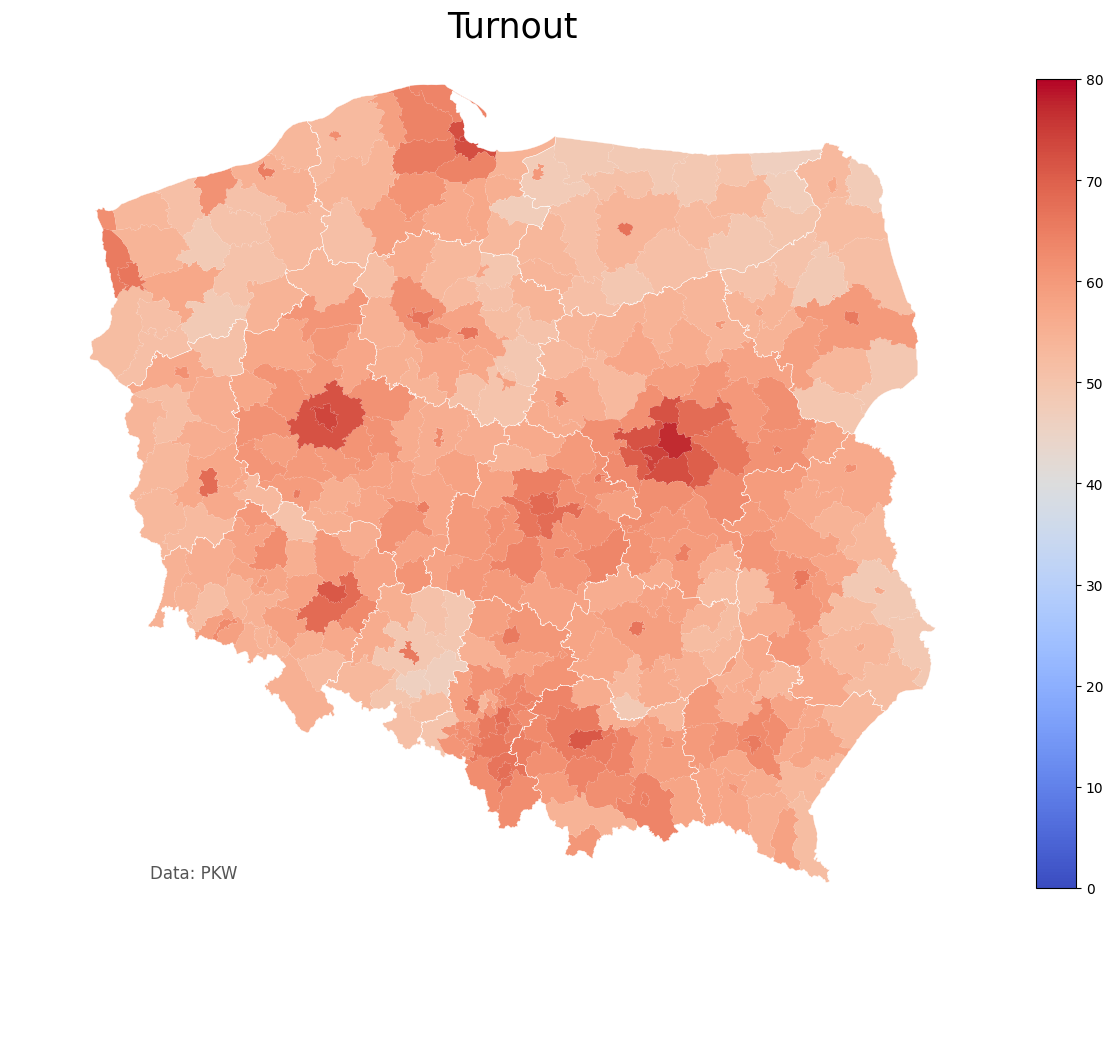

In [12]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Turnout", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
turnout_vmax = float(df['Frekwencja'].max())
scalarmappable = plt.cm.ScalarMappable(cmap="coolwarm",
                           norm=plt.Normalize(vmin=0,vmax=80))
cbar = fig.colorbar(scalarmappable, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="Frekwencja", cmap="coolwarm", linewidth=0.1, ax=ax, vmin=0, vmax=80);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);

#### Invalid ballots

In [13]:
display(HTML(df.nlargest(3, "% głosów nieważnych").to_html(columns=['Województwo', 'Powiat', '% głosów nieważnych'], index=False)))

Województwo,Powiat,% głosów nieważnych
zachodniopomorskie,choszczeński,2.45
kujawsko-pomorskie,lipnowski,2.40
pomorskie,sztumski,2.37


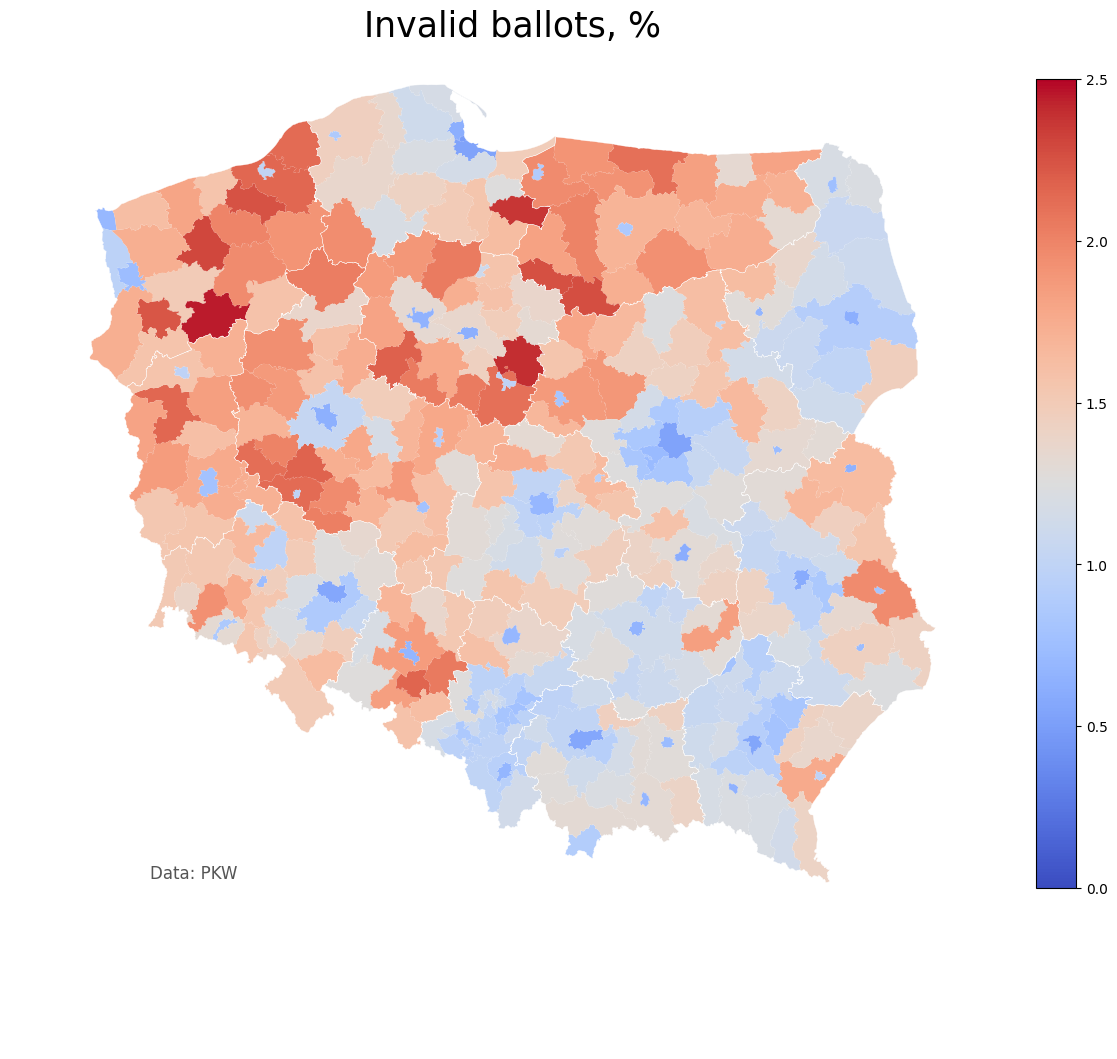

In [14]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Invalid ballots, %", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
sm = plt.cm.ScalarMappable(cmap="coolwarm",
                           norm=plt.Normalize(vmin=0,vmax=2.5))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="% głosów nieważnych", cmap="coolwarm", linewidth=0.1, ax=ax, vmin=0, vmax=2.5);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);

#### Election lists

In [15]:
display(HTML(df.nlargest(3, "KO").to_html(columns=['Województwo', 'Powiat', 'KO'], index=False)))

Województwo,Powiat,KO
pomorskie,Sopot,50.11
pomorskie,Gdańsk,47.99
wielkopolskie,Poznań,46.34


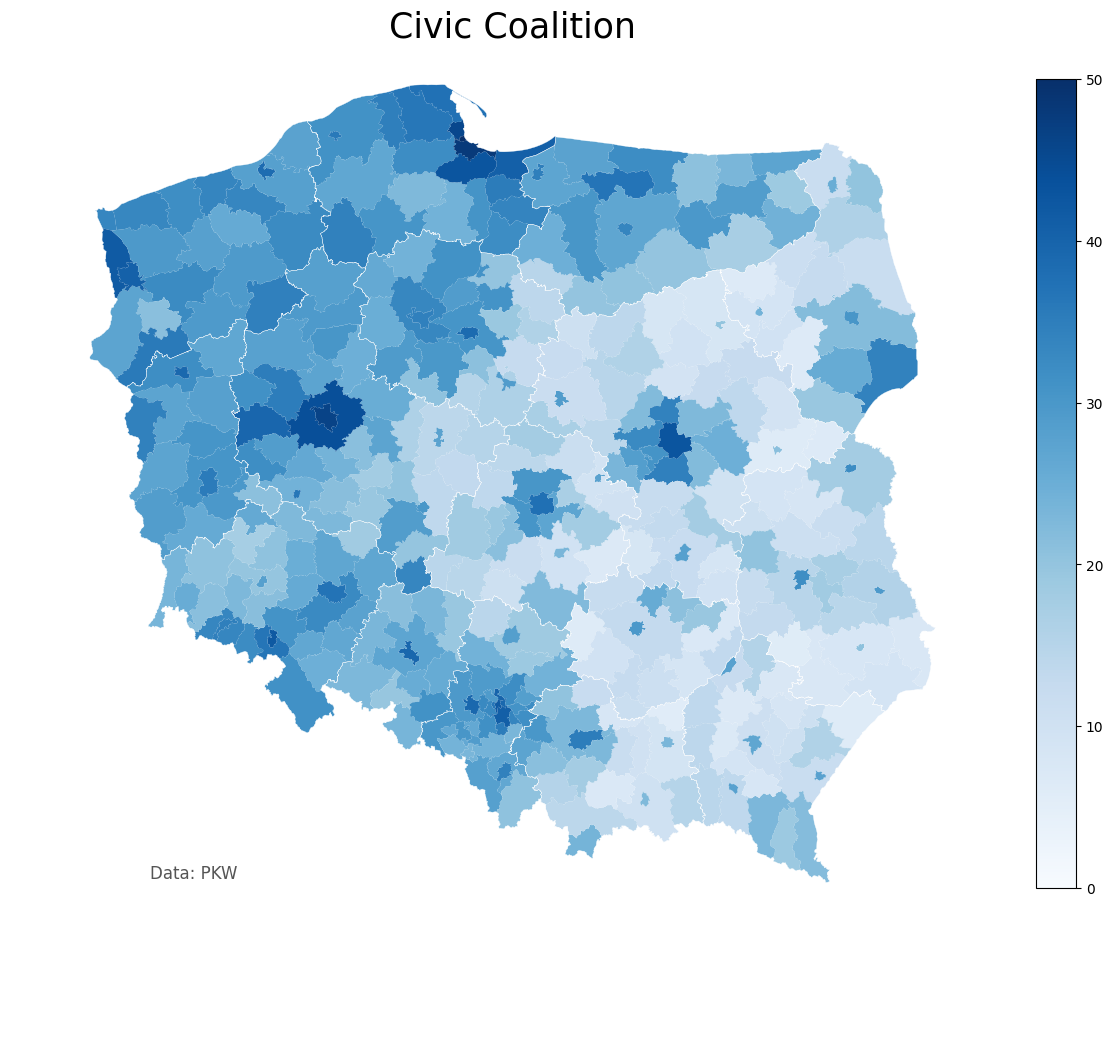

In [16]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Civic Coalition", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
sm = plt.cm.ScalarMappable(cmap="Blues",
                           norm=plt.Normalize(vmin=0,vmax=50))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="KO", cmap="Blues", linewidth=0.1, ax=ax, vmin=0, vmax=50);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);

In [17]:
display(HTML(df.nlargest(3, "Konfederacja").to_html(columns=['Województwo', 'Powiat', 'Konfederacja'], index=False)))

Województwo,Powiat,Konfederacja
wielkopolskie,średzki,14.20
łódzkie,bełchatowski,10.00
wielkopolskie,gostyński,9.96


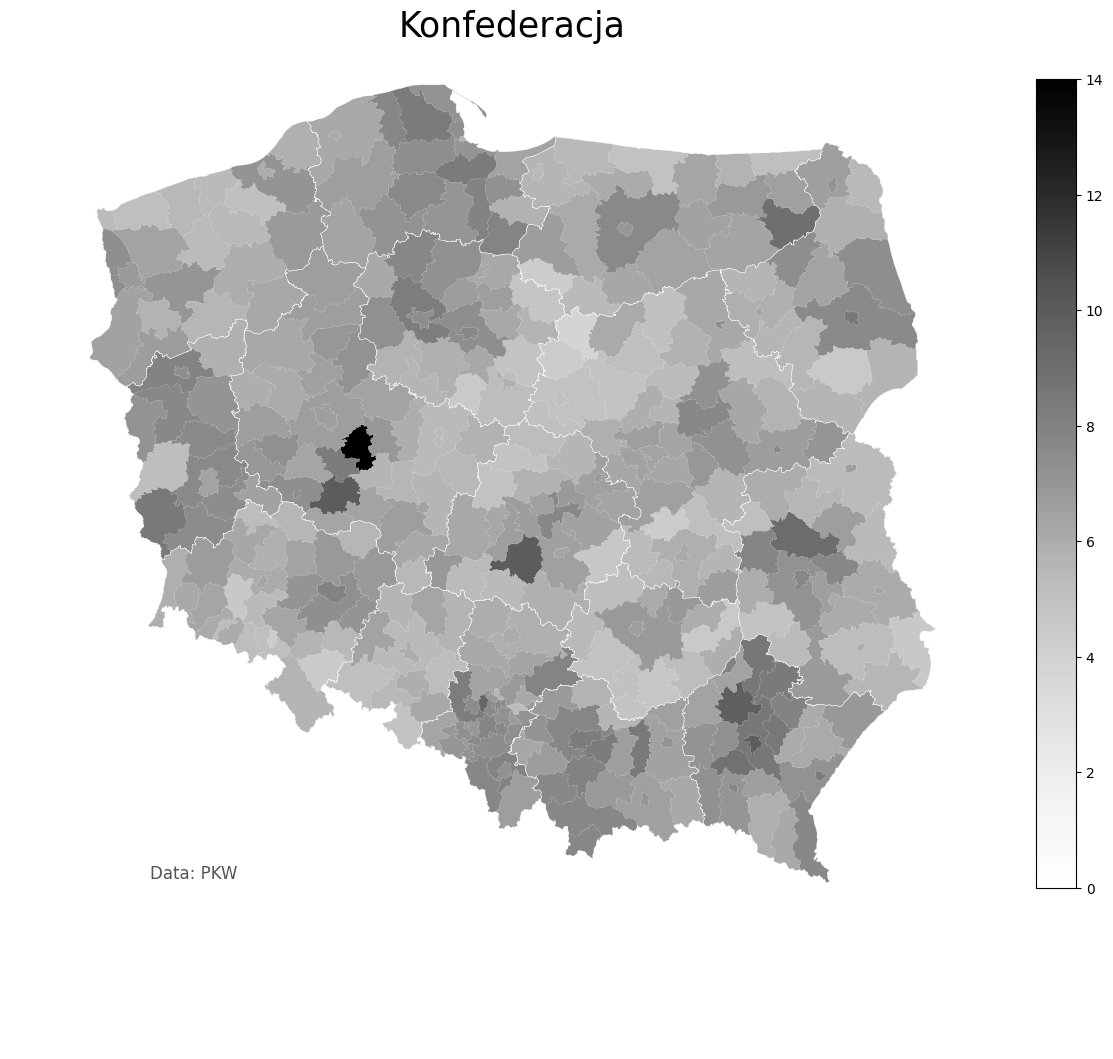

In [18]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Konfederacja", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
sm = plt.cm.ScalarMappable(cmap="Greys",
                           norm=plt.Normalize(vmin=0,vmax=14))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="Konfederacja", cmap="Greys", linewidth=.1, ax=ax, vmin=0, vmax=14);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);

In [19]:
display(HTML(df.nlargest(3, "PSL").to_html(columns=['Województwo', 'Powiat', 'PSL'], index=False)))

Województwo,Powiat,PSL
kujawsko-pomorskie,brodnicki,29.13
kujawsko-pomorskie,lipnowski,23.29
lubuskie,krośnieński,22.39


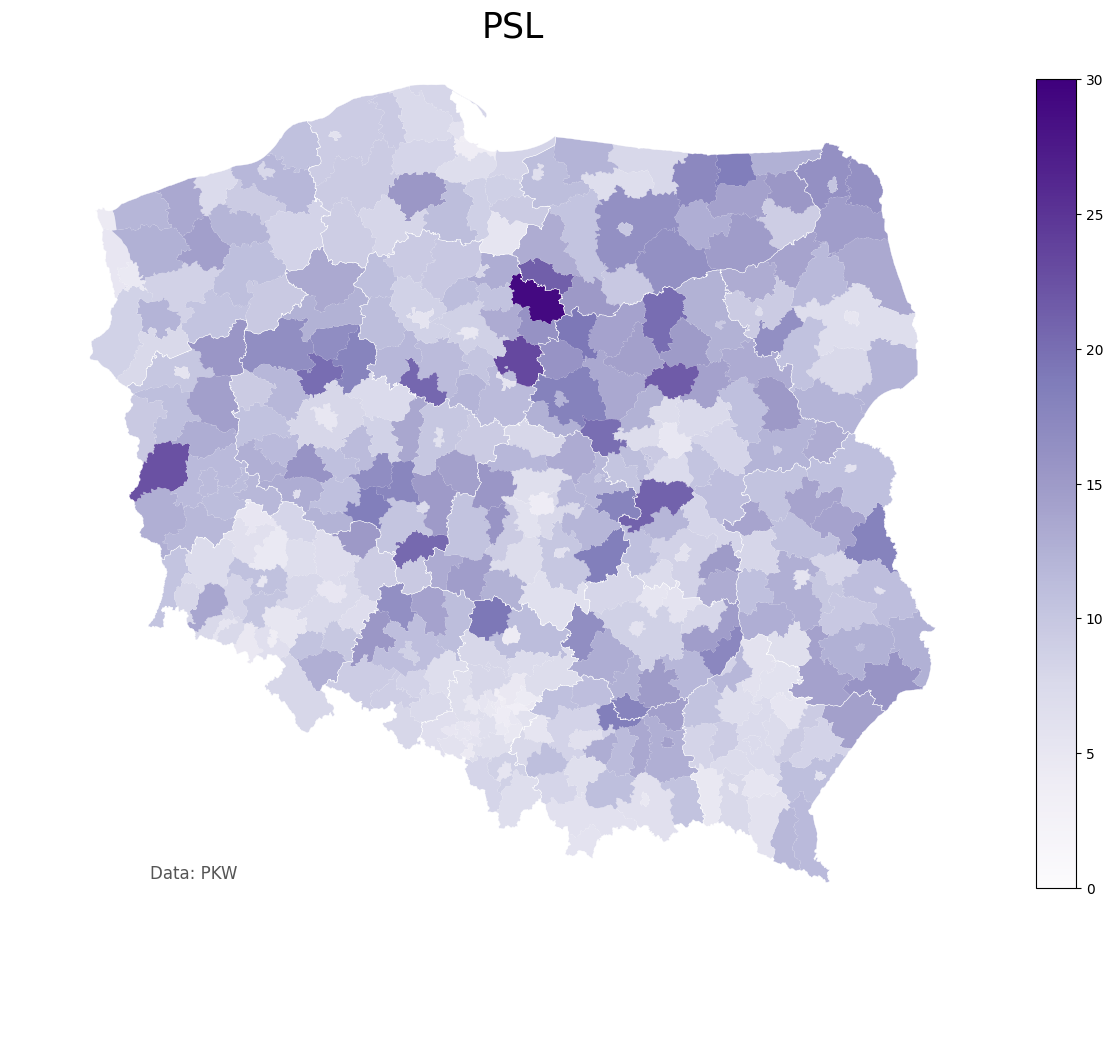

In [20]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("PSL", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
sm = plt.cm.ScalarMappable(cmap="Purples",
                           norm=plt.Normalize(vmin=0,vmax=30))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="PSL", cmap="Purples", linewidth=.1, ax=ax, vmin=0, vmax=30);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);

In [21]:
display(HTML(df.nlargest(3, "PIS").to_html(columns=['Województwo', 'Powiat', 'PIS'], index=False)))

Województwo,Powiat,PIS
lubelskie,janowski,77.19
podkarpackie,brzozowski,75.77
podkarpackie,leżajski,74.16


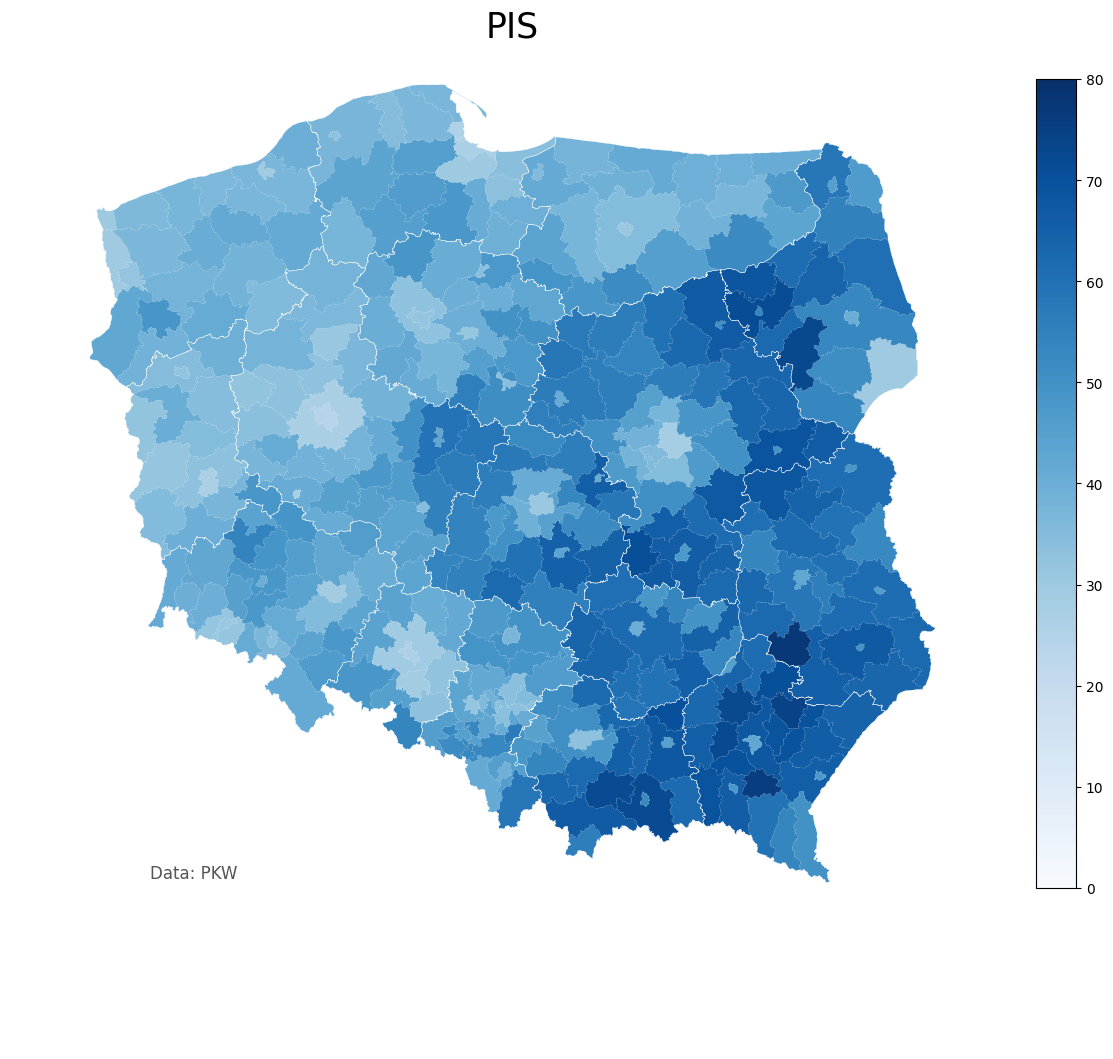

In [22]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("PIS", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
sm = plt.cm.ScalarMappable(cmap="Blues",
                           norm=plt.Normalize(vmin=0,vmax=80))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="PIS", cmap="Blues", linewidth=0.1, ax=ax, vmin=0, vmax=80);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);

In [23]:
display(HTML(df.nlargest(3, "Lewica").to_html(columns=['Województwo', 'Powiat', 'Lewica'], index=False)))

Województwo,Powiat,Lewica
śląskie,Sosnowiec,26.80
zachodniopomorskie,Świnoujście,26.70
śląskie,Dąbrowa Górnicza,25.64


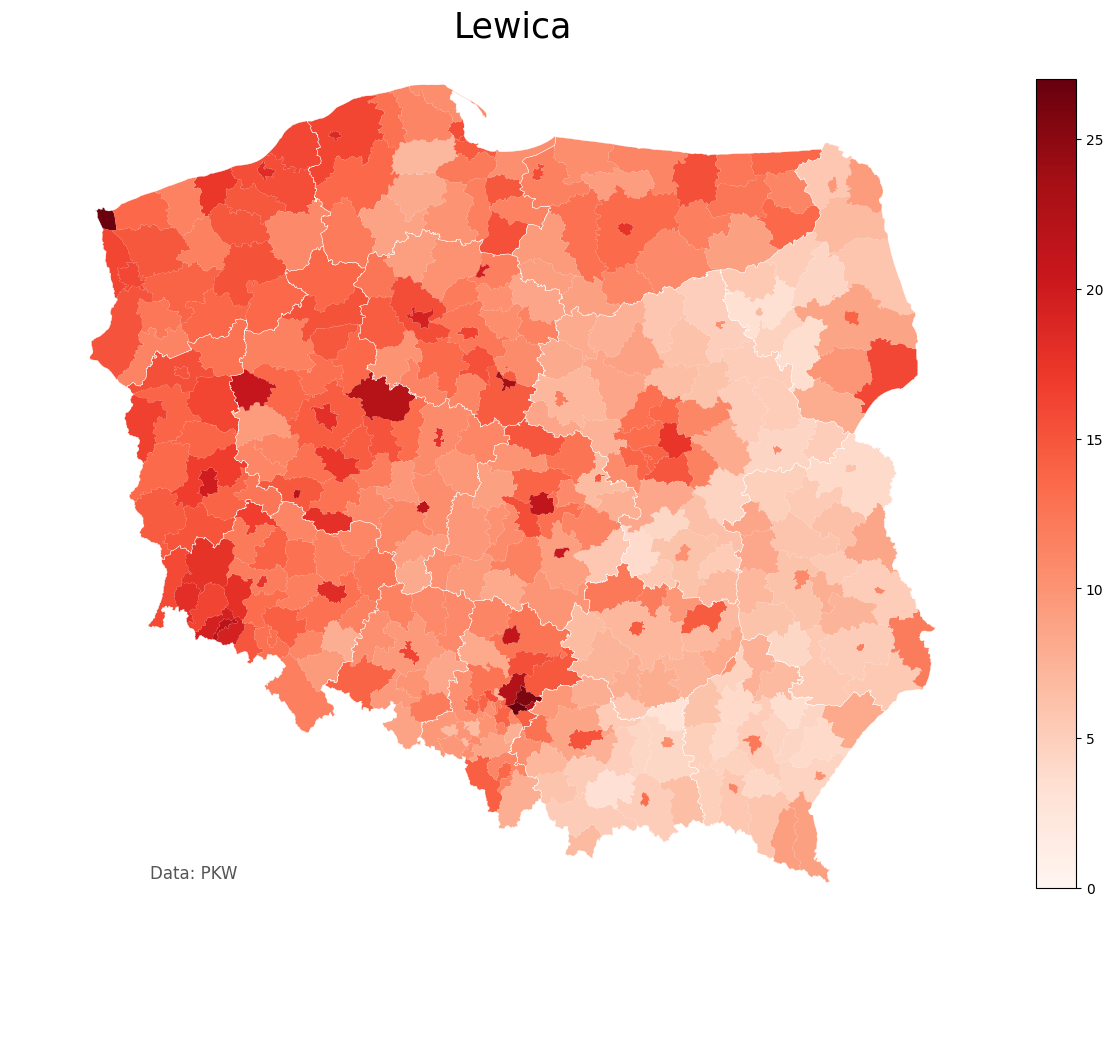

In [24]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Lewica", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")

sm = plt.cm.ScalarMappable(cmap="Reds",
                           norm=plt.Normalize(vmin=0,vmax=27))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="Lewica", cmap="Reds", linewidth=.1, ax=ax, vmin=0, vmax=27);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);

In [25]:
merged_df['Win'] = merged_df[["KO","Konfederacja","PSL","PIS","Lewica"]].idxmax(axis=1)
merged_df.head()

,JPT_SJR_KO,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,JPT_NAZWA1,...,Województwo,Frekwencja,% głosów nieważnych,% głosów ważnych,KO,Konfederacja,PSL,PIS,Lewica,Win
JPT_KOD_JE,,,,,,,,,,,,,,,,,,,,,
1815,POW,powiat ropczycko-sędziszowski,NaN,13415,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,podkarpackie,61.39,1.18,98.82,7.08,7.27,9.29,72.02,3.98,PIS
1410,POW,powiat łosicki,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,mazowieckie,57.69,1.30,98.70,6.49,7.05,13.06,66.55,5.16,PIS
1418,POW,powiat piaseczyński,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,mazowieckie,72.79,0.83,99.17,34.64,6.24,7.30,35.17,14.96,PIS
1425,POW,powiat radomski,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,mazowieckie,59.66,1.30,98.70,11.99,5.87,8.53,66.02,6.07,PIS
1427,POW,powiat sierpecki,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,mazowieckie,52.88,1.56,98.44,12.02,4.37,15.89,58.34,8.17,PIS


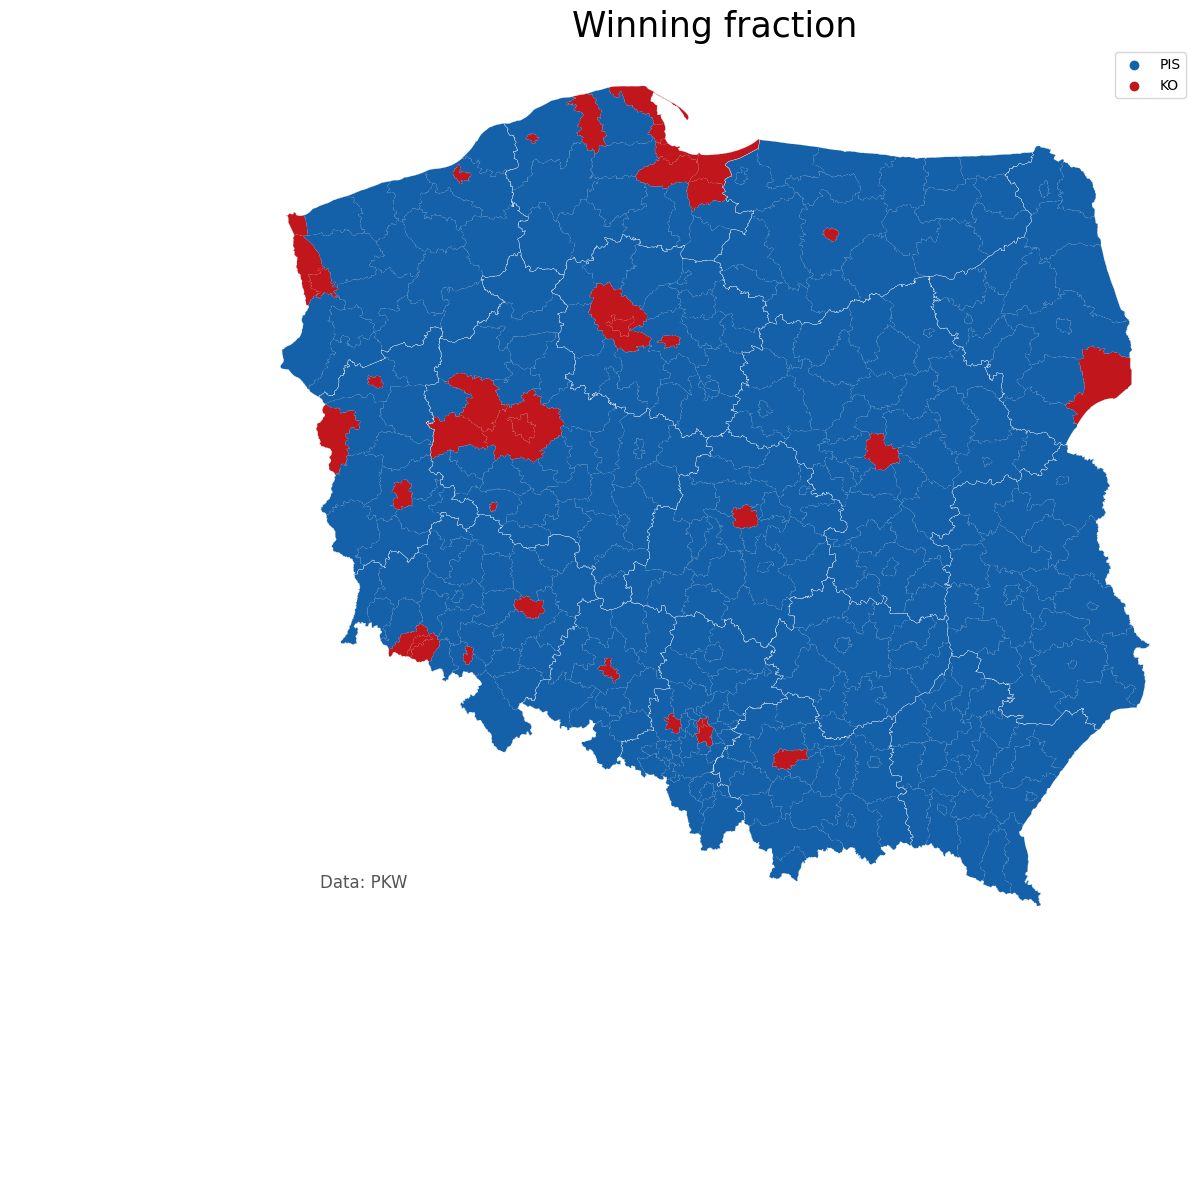

In [26]:
fractions = {"KO": "#C1161B",
             "Konfederacja": "#111111",
             "PSL":"#11AA11",
             "PIS":"#1561A9",
             "Lewica":"#AA1111"}
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.set_title("Winning fraction", fontdict={"fontsize": "25", "fontweight" : "3"})
divider = make_axes_locatable(ax)
ax.axis("off")
ax.annotate("Data: PKW",xy=(.16, .16),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")

for fraction, color in fractions.items():
    if (merged_df.Win.isin([fraction]).any()):
        merged_df[merged_df.Win==fraction].plot(color=color, linewidth=.0, ax=ax, aspect=1);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.15);
cmap = ListedColormap(["#1561A9", "#C1161B"])
lbls = ["PIS","KO"]
[ax.scatter([], [], color=cmap(i), label=lbls[i]) for i in range(2)]
ax.legend();